In [1]:
# libraries:
# General
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Preprocessing, metric, etc...
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Existing methods
from sklearn.ensemble import RandomForestClassifier 
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [18]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None,
                 prefix='Column_')
display(df.sample(5))
#display(df.info())
df

,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,...,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57
1286,0.0,0.39,0.99,0.0,0.39,0.0,0.19,0.00,0.19,0.19,...,0.0,0.074,0.0,0.174,0.548,0.000,4.965,97,993,1
1825,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.308,0.0,0.000,0.000,0.000,2.000,11,26,0
624,0.0,0.00,0.00,0.0,0.82,0.0,0.00,1.65,0.00,0.82,...,0.0,0.113,0.0,0.113,0.000,0.000,1.250,4,50,1
1417,0.1,0.20,1.01,0.0,0.80,0.8,0.50,0.00,0.80,0.10,...,0.0,0.110,0.0,0.488,0.157,0.015,8.550,669,1351,1
2240,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.337,0.0,0.000,0.000,0.337,2.950,7,59,0


,Column_0,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,...,Column_48,Column_49,Column_50,Column_51,Column_52,Column_53,Column_54,Column_55,Column_56,Column_57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [21]:
df1 = pd.read_csv('Malware.csv')
display(df1.sample(5))
#display(df.info())
df1

C:\Users\reood\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ID,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Unnamed: 55
19803,19804,332,224,8462,8,0,28672,8192,0,35262,...,1,3.46571,3.46571,3.46571,968.0,968,968,0,0,NaN
70841,70842,332,224,258,8,0,5120,1536,0,13102,...,1,3.169409,3.169409,3.169409,580.0,580,580,0,0,NaN
67041,67042,332,224,34,16,0,884736,1236992,0,863334,...,94,3.316684,1.488005,5.070367,8503.904255,48,162328,0,0,NaN
51662,51663,332,224,33167,2,25,37888,33792,0,40000,...,15,4.015813,2.436211,7.960395,1909.133333,44.0,9640,0,0,NaN
23055,23056,34404,240,8226,9,0,109056,132096,0,29496,...,1,3.436438,3.436438,3.436438,1296.0,1296,1296,0,0,NaN


,ID,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Unnamed: 55
0,1,34404,240,8226,14,12,78848,57856,0,72720,...,1,3.53097647713,3.53097647713,3.53097647713,1016,1016,1016,256,0,NaN
1,2,332,224,8450,14,12,43520,10752,0,42672,...,1,3.43871626779,3.43871626779,3.43871626779,996,996,996,160,0,NaN
2,3,332,224,8226,48,0,424960,2048,0,433018,...,1,3.40304950735,3.40304950735,3.40304950735,1172,1172,1172,0,0,NaN
3,4,34404,240,8226,14,12,414720,314880,0,411408,...,1,3.4238294228,3.4238294228,3.4238294228,916,916,916,256,0,NaN
4,5,332,224,8450,14,13,123392,45056,0,122303,...,1,1.99931030842,1.99931030842,1.99931030842,2156,2156,2156,160,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88255,88256,332,224,259,8,0,139264,12288,49152,187984,...,3,4.094443,1.919241,5.351174,3511.333333,20,9640,72,0,NaN
88256,88257,332,224,271,6,0,761856,479232,0,634325,...,55,3.117384,0.903812,6.106514,614.381818,11,16936,0,0,NaN
88257,88258,332,224,271,6,0,217088,147456,0,152994,...,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN
88258,88259,332,224,271,5,5,4352,11264,49152,69815,...,0,0.0,0.0,0.0,0.0,0,0,0,0,NaN


In [4]:
# Generate Train - Test splits
x_set = df.iloc[:,:-1].values
y_set = df.iloc[:,-1].values
xtrain, xtest, ytrain, ytest = train_test_split(x_set, y_set, test_size=0.3, random_state=10)

In [5]:
# Scaling the Train - Test splits
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

# Calculating accuracy (k-fold cross-validation)

In [6]:
# file: functionHO (accuracy calculation)

def error_rate(xtrain, ytrain, x, opts, model):
    # parameters
    k     = opts['k']
    fold  = opts['fold']
    xt    = fold['xt']
    yt    = fold['yt']
    
    
    # Number of instances
    num_train = np.size(xt, 0)

    # Define selected features
    xtrain  = xt[:, x == 1]
    ytrain  = yt.reshape(num_train)  # Solve bug
    
    # Training
    mdl     = model
    # mdl.fit(xtrain, ytrain)

    # Cross Validation
    stratifiedkf=StratifiedKFold(n_splits=5)
    score=cross_val_score(mdl, xtrain, ytrain, cv=stratifiedkf)
    # print("Cross Validation Scores are {}".format(score))
    # print("Average Cross Validation score :{}".format(score.mean()))
    
    error = 1 - score.mean()
    return error


# Error rate & Feature size
def Fun(xtrain, ytrain, x, opts, model):
    # Parameters
    alpha    = 0.99
    beta     = 1 - alpha
    # Original feature size
    max_feat = len(x)
    # Number of selected features
    num_feat = np.sum(x == 1)
    # Solve if no feature selected
    if num_feat == 0:
        cost  = 1
    else:
        # Get error rate
        error = error_rate(xtrain, ytrain, x, opts, model)
        # Objective function
        cost  = alpha * error + beta * (num_feat / max_feat)
        
    return cost

# Genetic Algorithm for Feature Selection:

In [7]:
# Genetic Algorithm for Feature Selection:

import numpy as np
from numpy.random import rand

def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    return X

def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    return Xbin

def roulette_wheel(prob):
    num = len(prob)
    C   = np.cumsum(prob)
    P   = rand()
    for i in range(num):
        if C[i] > P:
            index = i;
            break
    return index

def jfsGA(xtrain, ytrain, opts, model):
    # Parameters
    ub       = 1
    lb       = 0
    thres    = 0.5    
    CR       = 0.8     # crossover rate
    MR       = 0.01    # mutation rate

    N        = opts['N']
    max_iter = opts['T']
    if 'CR' in opts:
        CR   = opts['CR'] 
    if 'MR' in opts: 
        MR   = opts['MR']  
     # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    # Binary conversion
    X     = binary_conversion(X, thres, N, dim)
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='int')
    fitG  = float('inf')
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, X[i,:], opts, model)
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    # Pre
    curve = np.zeros([1, max_iter], dtype='float')
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (GA):", curve[0,t])
    t += 1
    while t < max_iter:
        # Probability
        inv_fit = 1 / (1 + fit)
        prob    = inv_fit / np.sum(inv_fit) 
        # Number of crossovers
        Nc = 0
        for i in range(N):
            if rand() < CR:
              Nc += 1
        x1 = np.zeros([Nc, dim], dtype='int')
        x2 = np.zeros([Nc, dim], dtype='int')
        for i in range(Nc):
            # Parent selection
            k1      = roulette_wheel(prob)
            k2      = roulette_wheel(prob)
            P1      = X[k1,:].copy()
            P2      = X[k2,:].copy()
            # Random one dimension from 1 to dim
            index   = np.random.randint(low = 1, high = dim-1)
            # Crossover
            x1[i,:] = np.concatenate((P1[0:index] , P2[index:]))
            x2[i,:] = np.concatenate((P2[0:index] , P1[index:]))
            # Mutation
            for d in range(dim):
                if rand() < MR:
                    x1[i,d] = 1 - x1[i,d]
                    
                if rand() < MR:
                    x2[i,d] = 1 - x2[i,d]
        # Merge two group into one
        Xnew = np.concatenate((x1 , x2), axis=0)
        # Fitness
        Fnew = np.zeros([2 * Nc, 1], dtype='float')
        for i in range(2 * Nc):
            Fnew[i,0] = Fun(xtrain, ytrain, Xnew[i,:], opts, model)
            if Fnew[i,0] < fitG:
                Xgb[0,:] = Xnew[i,:]
                fitG     = Fnew[i,0]       
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (GA):", curve[0,t])
        t += 1
        # Elitism 
        XX  = np.concatenate((X , Xnew), axis=0)
        FF  = np.concatenate((fit , Fnew), axis=0)
        # Sort in ascending order
        ind = np.argsort(FF, axis=0)
        for i in range(N):
            X[i,:]   = XX[ind[i,0],:]
            fit[i,0] = FF[ind[i,0]]         
    # Best feature subset
    Gbin       = Xgb[0,:]
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    ga_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    return ga_data 

# Particle Swarm Optimization for Feature Selection:

In [8]:
# Particle Swarm Optimization for Feature Selection:

def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    return X

def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
    return V, Vmax, Vmin

def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0 
    return Xbin

def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    return x
    
def jfsPSO(xtrain, ytrain, opts, model):
    # Parameters
    ub    = 1
    lb    = 0
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor

    N        = opts['N']
    max_iter = opts['T']
    if 'w' in opts:
        w    = opts['w']
    if 'c1' in opts:
        c1   = opts['c1']
    if 'c2' in opts:
        c2   = opts['c2'] 
    # Dimension
    dim = np.size(xtrain, 1) # number of columns (Features)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:], opts, model)
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])     
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    return pso_data    

# GA_implementation

In [9]:
# file: GA_implementation

def GA_implementation(model):
    fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}
    mdl       = model
    mdl.fit(xtrain, ytrain)

    # accuracy
    y_pred    = mdl.predict(xtest)
    print("Accuracy:", accuracy_score(ytest, y_pred))

    # parameter
    k    = 3     # k-value in KNN
    N    = 10    # number of chromosomes
    T    = 20    # maximum number of generations
    CR   = 0.8
    MR   = 0.01
    opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'CR':CR, 'MR':MR}

    # perform feature selection
    fmdl = jfsGA(x_set, y_set, opts, model)
    sf   = fmdl['sf']

    # model with selected features
    num_train = np.size(xtrain, 0)
    num_valid = np.size(xtest, 0)
    x_train   = xtrain[:, sf]
    y_train   = ytrain.reshape(num_train)  # Solve bug
    x_valid   = xtest[:, sf]
    y_valid   = ytest.reshape(num_valid)  # Solve bug

    mdl       = model
    mdl.fit(x_train, y_train)

    # accuracy
    y_pred    = mdl.predict(x_valid)
    print("Accuracy:", accuracy_score(y_valid, y_pred))
    print("Confusion Matrix:= \n", confusion_matrix(y_valid, y_pred) )

    # number of selected features
    num_feat = fmdl['nf']
    print("Feature Size:", num_feat)
    features_indexes = fmdl["sf"];
    print("Features Indexes:", fmdl["sf"])
    # selected_features = [y_set[i] for i in fmdl["sf"]]
    # print("Selected Features:", selected_features)

    # plot convergence
    curve   = fmdl['c']
    curve   = curve.reshape(np.size(curve,1))
    x       = np.arange(0, opts['T'], 1.0) + 1.0

    fig, ax = plt.subplots()
    ax.plot(x, curve, 'o-')
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Fitness')
    ax.set_title('GA')
    ax.grid()
    plt.show()

# PSO_implementation

In [10]:
# file: PSO_implementation (KNN)

def PSO_implementation(model):
    fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}
    mdl       = model
    mdl.fit(xtrain, ytrain)

    # accuracy
    y_pred    = mdl.predict(xtest)
    print("Accuracy:", accuracy_score(ytest, y_pred))

    # parameter
    k    = 5     # k-value in KNN
    N    = 10    # number of particles
    T    = 20   # maximum number of iterations
    w    = 0.9
    c1   = 2
    c2   = 2
    opts = {'k':k, 'fold':fold, 'N':N, 'T':T, 'w':w, 'c1':c1, 'c2':c2}

    # perform feature selection
    fmdl = jfsPSO(x_set, y_set, opts, model)
    sf = fmdl['sf']

    # model with selected features
    num_train = np.size(xtrain, 0)
    num_valid = np.size(xtest, 0)
    x_train   = xtrain[:, sf]
    y_train   = ytrain.reshape(num_train)  # Solve bug
    x_valid   = xtest[:, sf]
    y_valid   = ytest.reshape(num_valid)  # Solve bug

    mdl       = model
    mdl.fit(x_train, y_train)

    # accuracy
    y_pred    = mdl.predict(x_valid)
    print("Accuracy:", accuracy_score(y_valid, y_pred))

    # number of selected features
    num_feat = fmdl['nf']
    print("Feature Size:", num_feat)
    features_indexes = fmdl["sf"];
    print("Features Indexes:", fmdl["sf"])
    # selected_features = [y_set[i] for i in fmdl["sf"]]
    # print("Selected Features:", selected_features)

    # plot convergence
    curve   = fmdl['c']
    curve   = curve.reshape(np.size(curve,1))
    x       = np.arange(0, opts['T'], 1.0) + 1.0

    fig, ax = plt.subplots()
    ax.plot(x, curve, 'o-')
    ax.set_xlabel('Number of Iterations')
    ax.set_ylabel('Fitness')
    ax.set_title('PSO')
    ax.grid()
    plt.show()

# Decision Tree Classifier

Accuracy: 0.9174511223750905
Iteration: 1
Best (PSO): 0.09438122480113334
Iteration: 2
Best (PSO): 0.09380974174566852
Iteration: 3
Best (PSO): 0.09073520758417788
Iteration: 4
Best (PSO): 0.08643085975809084
Iteration: 5
Best (PSO): 0.08612340634194182
Iteration: 6
Best (PSO): 0.0799309142421269
Iteration: 7
Best (PSO): 0.0799309142421269
Iteration: 8
Best (PSO): 0.0799309142421269
Iteration: 9
Best (PSO): 0.0799309142421269
Iteration: 10
Best (PSO): 0.0799309142421269
Iteration: 11
Best (PSO): 0.07764672550942585
Iteration: 12
Best (PSO): 0.07764672550942585
Iteration: 13
Best (PSO): 0.07764672550942585
Iteration: 14
Best (PSO): 0.07764672550942585
Iteration: 15
Best (PSO): 0.07720725727361893
Iteration: 16
Best (PSO): 0.07720725727361893
Iteration: 17
Best (PSO): 0.07720725727361893
Iteration: 18
Best (PSO): 0.07637348806799613
Iteration: 19
Best (PSO): 0.07637348806799613
Iteration: 20
Best (PSO): 0.07637348806799613
Accuracy: 0.9312092686459088
Feature Size: 27
Features Indexes: [

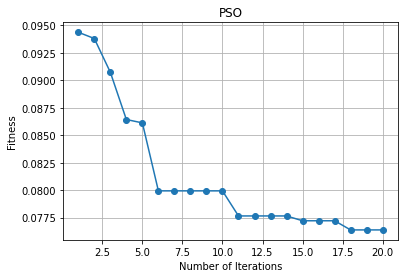

Accuracy: 0.9174511223750905
Generation: 1
Best (GA): 0.1007925792742726
Generation: 2
Best (GA): 0.09877242018088704
Generation: 3
Best (GA): 0.09877242018088704
Generation: 4
Best (GA): 0.09780663615560642
Generation: 5
Best (GA): 0.09780663615560642
Generation: 6
Best (GA): 0.09688427590715915
Generation: 7
Best (GA): 0.0956978860193964
Generation: 8
Best (GA): 0.09249133703824786
Generation: 9
Best (GA): 0.09047117794486219
Generation: 10
Best (GA): 0.09047117794486219
Generation: 11
Best (GA): 0.09025231557153762
Generation: 12
Best (GA): 0.0898128473357306
Generation: 13
Best (GA): 0.0850256074970033
Generation: 14
Best (GA): 0.08427868584504748
Generation: 15
Best (GA): 0.08427868584504748
Generation: 16
Best (GA): 0.08427868584504748
Generation: 17
Best (GA): 0.08427868584504748
Generation: 18
Best (GA): 0.08427868584504748
Generation: 19
Best (GA): 0.08427868584504748
Generation: 20
Best (GA): 0.08427868584504748
Accuracy: 0.9283128167994207
Confusion Matrix:= 
 [[777  44]
 [ 

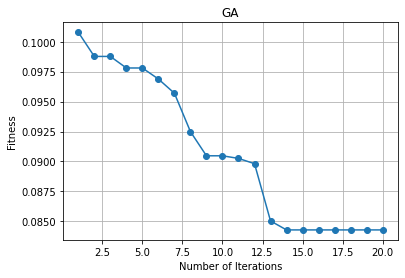

In [11]:
# Train
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
PSO_implementation(dtClf)
GA_implementation(dtClf)

## Random Forest Classifier

Accuracy: 0.9572773352643013
Iteration: 1
Best (PSO): 0.060427590715920215
Iteration: 2
Best (PSO): 0.060427590715920215
Iteration: 3
Best (PSO): 0.06034074316225344
Iteration: 4
Best (PSO): 0.060208728342595545
Iteration: 5
Best (PSO): 0.060208728342595545
Iteration: 6
Best (PSO): 0.060208728342595545
Iteration: 7
Best (PSO): 0.060208728342595545
Iteration: 8
Best (PSO): 0.05660613490247353
Iteration: 9
Best (PSO): 0.05660613490247353
Iteration: 10
Best (PSO): 0.05660613490247353
Iteration: 11
Best (PSO): 0.05660613490247353
Iteration: 12
Best (PSO): 0.05660613490247353
Iteration: 13
Best (PSO): 0.05660613490247353
Iteration: 14
Best (PSO): 0.05660613490247353
Iteration: 15
Best (PSO): 0.05660613490247353
Iteration: 16
Best (PSO): 0.05660613490247353
Iteration: 17
Best (PSO): 0.05660613490247353
Iteration: 18
Best (PSO): 0.05660613490247353
Iteration: 19
Best (PSO): 0.05660613490247353
Iteration: 20
Best (PSO): 0.05660613490247353
Accuracy: 0.9514844315713251
Feature Size: 37
Features

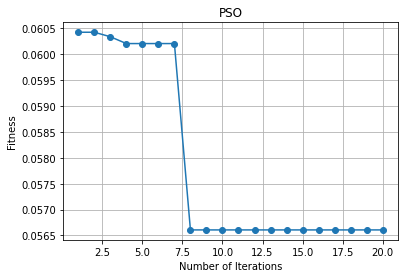

Accuracy: 0.9572773352643013
Generation: 1
Best (GA): 0.05963724528713094
Generation: 2
Best (GA): 0.05963724528713094
Generation: 3
Best (GA): 0.05963724528713094
Generation: 4
Best (GA): 0.05963724528713094
Generation: 5
Best (GA): 0.05963724528713094
Generation: 6
Best (GA): 0.05963724528713094
Generation: 7
Best (GA): 0.05963724528713094
Generation: 8
Best (GA): 0.05963724528713094
Generation: 9
Best (GA): 0.05963724528713094
Generation: 10
Best (GA): 0.05963724528713094
Generation: 11
Best (GA): 0.05963724528713094
Generation: 12
Best (GA): 0.05963724528713094
Generation: 13
Best (GA): 0.05963724528713094
Generation: 14
Best (GA): 0.05963724528713094
Generation: 15
Best (GA): 0.05963724528713094
Generation: 16
Best (GA): 0.05963724528713094
Generation: 17
Best (GA): 0.05963724528713094
Generation: 18
Best (GA): 0.05963724528713094
Generation: 19
Best (GA): 0.05963724528713094
Generation: 20
Best (GA): 0.05963724528713094
Accuracy: 0.9377262853005068
Confusion Matrix:= 
 [[789  32]

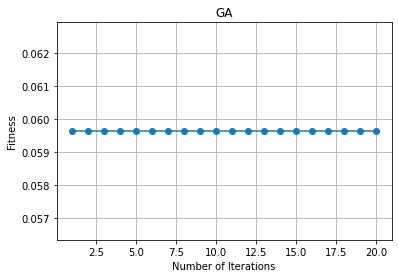

In [12]:
rfClf = RandomForestClassifier(random_state=0)
PSO_implementation(rfClf)
GA_implementation(rfClf)

# Naive Bayes

Accuracy: 0.8211440984793628
Iteration: 1
Best (PSO): 0.22794802222948665
Iteration: 2
Best (PSO): 0.22311561512476835
Iteration: 3
Best (PSO): 0.21235474555955114
Iteration: 4
Best (PSO): 0.21235474555955114
Iteration: 5
Best (PSO): 0.20809382151029743
Iteration: 6
Best (PSO): 0.20809382151029743
Iteration: 7
Best (PSO): 0.20668856924921
Iteration: 8
Best (PSO): 0.2018579056336494
Iteration: 9
Best (PSO): 0.2014184373978425
Iteration: 10
Best (PSO): 0.20005660891358826
Iteration: 11
Best (PSO): 0.19851934183284306
Iteration: 12
Best (PSO): 0.19851934183284306
Iteration: 13
Best (PSO): 0.19851934183284306
Iteration: 14
Best (PSO): 0.19851934183284306
Iteration: 15
Best (PSO): 0.19851934183284306
Iteration: 16
Best (PSO): 0.19807987359703613
Iteration: 17
Best (PSO): 0.19794785877737825
Iteration: 18
Best (PSO): 0.197772420180887
Iteration: 19
Best (PSO): 0.197772420180887
Iteration: 20
Best (PSO): 0.197772420180887
Accuracy: 0.8305575669804489
Feature Size: 32
Features Indexes: [ 0  1 

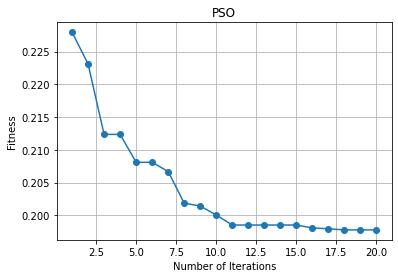

Accuracy: 0.8211440984793628
Generation: 1
Best (GA): 0.23009845265337264
Generation: 2
Best (GA): 0.23009845265337264
Generation: 3
Best (GA): 0.2154727034978751
Generation: 4
Best (GA): 0.2154727034978751
Generation: 5
Best (GA): 0.21437490465293668
Generation: 6
Best (GA): 0.20717146126185038
Generation: 7
Best (GA): 0.20659997820638554
Generation: 8
Best (GA): 0.2039649122807017
Generation: 9
Best (GA): 0.2039649122807017
Generation: 10
Best (GA): 0.2039649122807017
Generation: 11
Best (GA): 0.20181273836765837
Generation: 12
Best (GA): 0.19764040536122923
Generation: 13
Best (GA): 0.19764040536122923
Generation: 14
Best (GA): 0.19764040536122923
Generation: 15
Best (GA): 0.19276457447967738
Generation: 16
Best (GA): 0.19276457447967738
Generation: 17
Best (GA): 0.19276457447967738
Generation: 18
Best (GA): 0.17734847989539054
Generation: 19
Best (GA): 0.17734847989539054
Generation: 20
Best (GA): 0.1532350986161055
Accuracy: 0.8501086169442433
Confusion Matrix:= 
 [[639 182]
 [ 25

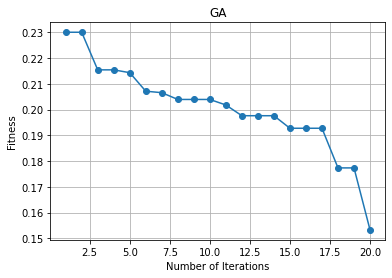

In [14]:
NBClf = GaussianNB()   
PSO_implementation(NBClf)
GA_implementation(NBClf)

# Support Vector Machines -- *Linear*

Accuracy: 0.9355539464156408
Iteration: 1
Best (PSO): 0.0959601721695544
Iteration: 2
Best (PSO): 0.0959601721695544
Iteration: 3
Best (PSO): 0.0959601721695544
Iteration: 4
Best (PSO): 0.09288563800806376
Iteration: 5
Best (PSO): 0.09288563800806376
Iteration: 6
Best (PSO): 0.09288563800806376
Iteration: 7
Best (PSO): 0.09288563800806376
Iteration: 8
Best (PSO): 0.0926650321455814
Iteration: 9
Best (PSO): 0.0926650321455814
Iteration: 10
Best (PSO): 0.09148038574697623
Iteration: 11
Best (PSO): 0.08932821183393255
Iteration: 12
Best (PSO): 0.0877475209763539
Iteration: 13
Best (PSO): 0.08445238095238089
Iteration: 14
Best (PSO): 0.08423351857905635
Iteration: 15
Best (PSO): 0.08410150375939844
Iteration: 16
Best (PSO): 0.08282826631796882
Iteration: 17
Best (PSO): 0.08269625149831092
Iteration: 18
Best (PSO): 0.08225678326250423
Iteration: 19
Best (PSO): 0.0814230140568814
Iteration: 20
Best (PSO): 0.0814230140568814
Accuracy: 0.9268645908761767
Feature Size: 33
Features Indexes: [ 0 

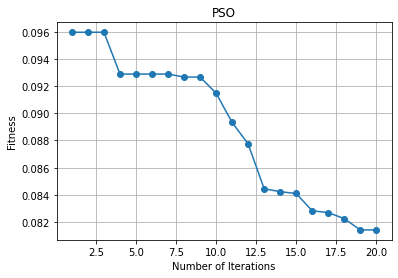

Accuracy: 0.9355539464156408
Generation: 1
Best (GA): 0.10206581671570222
Generation: 2
Best (GA): 0.0964013838945189
Generation: 3
Best (GA): 0.0964013838945189
Generation: 4
Best (GA): 0.0964013838945189
Generation: 5
Best (GA): 0.0964013838945189
Generation: 6
Best (GA): 0.09156897678980058
Generation: 7
Best (GA): 0.0907786313610112
Generation: 8
Best (GA): 0.09011855726272215
Generation: 9
Best (GA): 0.08937163561076608
Generation: 10
Best (GA): 0.08744006756020488
Generation: 11
Best (GA): 0.08678173695107341
Generation: 12
Best (GA): 0.08678173695107341
Generation: 13
Best (GA): 0.08598964803312621
Generation: 14
Best (GA): 0.08467298681486338
Generation: 15
Best (GA): 0.08423351857905635
Generation: 16
Best (GA): 0.08190590606952154
Generation: 17
Best (GA): 0.08190590606952154
Generation: 18
Best (GA): 0.08177389124986387
Generation: 19
Best (GA): 0.08177389124986387
Generation: 20
Best (GA): 0.08164187643020586
Accuracy: 0.9246922519913107
Confusion Matrix:= 
 [[786  35]
 [ 6

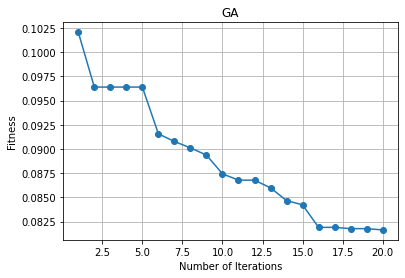

In [13]:
#SVM Model
clf = svm.SVC(kernel='linear') 
PSO_implementation(clf)
GA_implementation(clf)

# Support Vector Machines -- *Kernel*

In [ ]:
#SVM Model
# clf = svm.SVC(kernel='rbf') 
param_grid = {
    "C": [1e3, 5e3, 1e4, 5e4, 1e5],
    "gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
}
clf = GridSearchCV(svm.SVC(kernel="rbf", class_weight="balanced"), param_grid)
PSO_implementation(clf)
# GA_implementation(clf)

## KNN

Accuracy: 0.9051412020275162
Iteration: 1
Best (PSO): 0.11006134902473586
Iteration: 2
Best (PSO): 0.10501007954669286
Iteration: 3
Best (PSO): 0.10501007954669286
Iteration: 4
Best (PSO): 0.09280053394355459
Iteration: 5
Best (PSO): 0.09280053394355459
Iteration: 6
Best (PSO): 0.09280053394355459
Iteration: 7
Best (PSO): 0.09280053394355459
Iteration: 8
Best (PSO): 0.09280053394355459
Iteration: 9
Best (PSO): 0.09280053394355459
Iteration: 10
Best (PSO): 0.09196502124877418
Iteration: 11
Best (PSO): 0.09196502124877418
Iteration: 12
Best (PSO): 0.09196502124877418
Iteration: 13
Best (PSO): 0.09196502124877418
Iteration: 14
Best (PSO): 0.09121809959681824
Iteration: 15
Best (PSO): 0.09121809959681824
Iteration: 16
Best (PSO): 0.09121809959681824
Iteration: 17
Best (PSO): 0.09121809959681824
Iteration: 18
Best (PSO): 0.08761724964585381
Iteration: 19
Best (PSO): 0.08761724964585381
Iteration: 20
Best (PSO): 0.08757382586902027
Accuracy: 0.9087617668356264
Feature Size: 26
Features Index

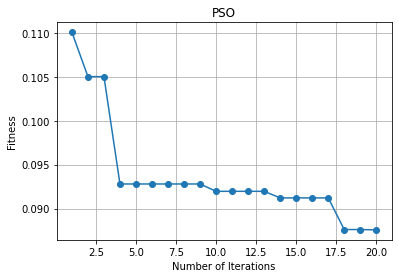

Accuracy: 0.9051412020275162
Generation: 1
Best (GA): 0.10979731938541994
Generation: 2
Best (GA): 0.10979731938541994
Generation: 3
Best (GA): 0.10654734662743807
Generation: 4
Best (GA): 0.10457061131088595
Generation: 5
Best (GA): 0.1018921216083688
Generation: 6
Best (GA): 0.10167151574588644
Generation: 7
Best (GA): 0.09947591805600975
Generation: 8
Best (GA): 0.09301939631687914
Generation: 9
Best (GA): 0.09284395772038813
Generation: 10
Best (GA): 0.09284395772038813
Generation: 11
Best (GA): 0.09038433039119544
Generation: 12
Best (GA): 0.09038433039119544
Generation: 13
Best (GA): 0.08946197014274815
Generation: 14
Best (GA): 0.08946197014274815
Generation: 15
Best (GA): 0.08946197014274815
Generation: 16
Best (GA): 0.08946197014274815
Generation: 17
Best (GA): 0.08840759507464307
Generation: 18
Best (GA): 0.08840759507464307
Generation: 19
Best (GA): 0.08836417129780987
Generation: 20
Best (GA): 0.08836417129780987
Accuracy: 0.9102099927588704
Confusion Matrix:= 
 [[769  52]


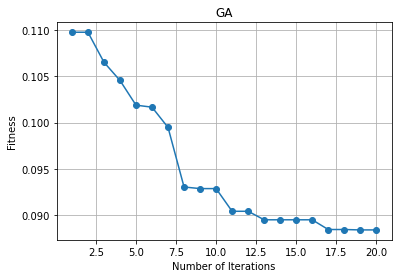

In [16]:
#KNN Model
neigh = KNeighborsClassifier(n_neighbors=3)
PSO_implementation(neigh)
GA_implementation(neigh)

## Multi Layer Perceptron Classifier (MLPC)

In [ ]:
from sklearn.neural_network import MLPClassifier

#ANN Model
ANNclf = MLPClassifier(random_state=1)
PSO_implementation(ANNclf)
# GA_implementation(ANNclf)

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9514844315713251


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 1
Best (PSO): 0.08682690421706443


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 2
Best (PSO): 0.07184853437942683


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 3
Best (PSO): 0.07184853437942683


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 4
Best (PSO): 0.06763277759616425


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 5
Best (PSO): 0.06732532418001523


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 6
Best (PSO): 0.06530516508662966


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 7
Best (PSO): 0.06530516508662966


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 8
Best (PSO): 0.06530516508662966


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 9
Best (PSO): 0.06530516508662966


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 10
Best (PSO): 0.06530516508662966


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Iteration: 11
Best (PSO): 0.06530516508662966


C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\reood\anaconda3\lib\site-packages\sklearn\neural_network\_multi

# AdaBoosted  Classifiers

In [ ]:
# Create and fit an AdaBoosted decision tree
from sklearn.ensemble import AdaBoostClassifier
dta = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200
)

PSO_implementation(dta)
# GA_implementation(dta)

In [ ]:
# Create and fit an AdaBoosted SVM
from sklearn.ensemble import AdaBoostClassifier
svmla = AdaBoostClassifier(
     svm.SVC(kernel='linear'), algorithm="SAMME", n_estimators=200
)
PSO_implementation(svmla)
# GA_implementation(svmla)